In [1]:
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns

In [2]:
files = glob.glob('../../../IRL22SU/*_*.csv')
files
files_Fe2 = glob.glob('../../../IRL22SU/*Fe2*.csv')
files_FeT = glob.glob('../../../IRL22SU/*FeT*.csv')
files_TOC = glob.glob('../../../IRL22SU/*TOC*.csv')
files_spectra = glob.glob('../../../IRL22SU/*Pchip*.csv')
files_CDOM = glob.glob('../../../IRL22SU/*out*.csv')
files_Fe2

['../../../IRL22SU\\RHZ_WC_Fe2_IRL22SU_ID2234_SB.csv',
 '../../../IRL22SU\\RHZ_WC_Fe2_IRL22SU_ID2235_BP.csv']

In [3]:
def GET_DATA(name):
    df = pd.read_csv(name, sep=',', index_col=0)
    df = pd.DataFrame(df)
    return df

In [4]:
frames = []
for f in files_Fe2:
    df = GET_DATA(f) # runs the processing function  
    frames.append(df) # adds the new col from each scan to a part of frames 
df_Fe2 = pd.concat(frames, axis=0, ignore_index=False)

frames = []
for f in files_FeT:
    df = GET_DATA(f) # runs the processing function  
    frames.append(df) # adds the new col from each scan to a part of frames 
df_FeT = pd.concat(frames, axis=0, ignore_index=False)

frames = []
for f in files_TOC:
    df = GET_DATA(f) # runs the processing function  
    frames.append(df) # adds the new col from each scan to a part of frames 
df_TOC = pd.concat(frames, axis=0, ignore_index=False)

frames = []
for f in files_CDOM:
    df = GET_DATA(f) # runs the processing function  
    frames.append(df) # adds the new col from each scan to a part of frames 
df_CDOM = pd.concat(frames, axis=0, ignore_index=False)

frames = []
for f in files_spectra:
    df = GET_DATA(f) # runs the processing function  
    frames.append(df) # adds the new col from each scan to a part of frames 
df_spectra = pd.concat(frames, axis=0, ignore_index=False)


In [5]:
df = df_Fe2.join(df_FeT, how='outer', lsuffix='_Fe2', rsuffix='_FeT', sort=False)
df = df.join(df_TOC, how='outer', sort=False)
df = df.join(df_CDOM, how='outer', sort=False)
#df = df.join(df_spectra, how='outer', sort=False)
df = df[df.index.notnull()]

In [6]:
df.dtypes

Treatment_Fe2          object
Campaign_Fe2           object
Date_Fe2               object
Location_Fe2           object
Depth_Fe2              object
Fe Conc (uM)_Fe2      float64
Fe Conc (mg/L)_Fe2    float64
Treatment_FeT          object
Campaign_FeT           object
Date_FeT               object
Location_FeT           object
Depth_FeT              object
Fe Conc (uM)_FeT      float64
Fe Conc (mg/L)_FeT    float64
Treatment              object
Campaign               object
Date                   object
Location               object
Depth                  object
NPOC Conc (mg/L)      float64
TN Conc (mg/L)        float64
NPOC Conc (uM)        float64
TN Conc (uM)          float64
ss_275_700_SEM        float64
ss_275_295_SEM        float64
ss_350_400_SEM        float64
ss_275_700_HM         float64
ss_275_295_HM         float64
ss_350_400_HM         float64
abs_254_SEM           float64
abs_280_SEM           float64
abs_320_SEM           float64
abs_412_SEM           float64
abs_440_SE

In [7]:
##CHOSE SUBSETS
G1 = 'P2F'
G1 = 'RHZP2F'

##CHOSE LOCATION
G2 = 'B point'
G2 = 'S beach '

print("you pciked "+ G1 + " at " + G2)

you pciked RHZP2F at S beach 


In [8]:
ds_grouped = df.groupby(["Treatment_Fe2"])
ds_grouped.groups

ds = ds_grouped.get_group(G1)

In [9]:
ds_grouped = ds.groupby(["Location"])
ds_grouped.groups

ds = ds_grouped.get_group(G2)

In [10]:
for col in ds:
    print(col)

Treatment_Fe2
Campaign_Fe2
Date_Fe2
Location_Fe2
Depth_Fe2
Fe Conc (uM)_Fe2
Fe Conc (mg/L)_Fe2
Treatment_FeT
Campaign_FeT
Date_FeT
Location_FeT
Depth_FeT
Fe Conc (uM)_FeT
Fe Conc (mg/L)_FeT
Treatment
Campaign
Date
Location
Depth
NPOC Conc (mg/L)
TN Conc (mg/L)
NPOC Conc (uM)
TN Conc (uM)
ss_275_700_SEM
ss_275_295_SEM
ss_350_400_SEM
ss_275_700_HM
ss_275_295_HM
ss_350_400_HM
abs_254_SEM
abs_280_SEM
abs_320_SEM
abs_412_SEM
abs_440_SEM
abs_254_HM
abs_280_HM
abs_320_HM
abs_412_HM
abs_440_HM
SR_SEM
SR_HM
350_intergration


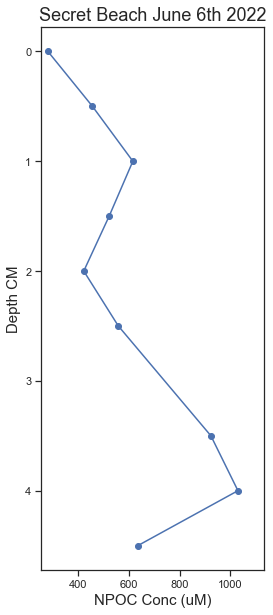

In [11]:
##PLOT ONE VAR ON DEPTH 

sns.set_theme(style="ticks")

fig, ax = plt.subplots(figsize=(4,10))

X = ds["NPOC Conc (uM)"] #X var 
X = np.asarray(X, dtype=float).ravel()
Y = ds['Depth'] #Y var
Y = np.asarray(Y, dtype=float).ravel()
Z = None #color

Xmin = X.min()
Xmax = X.max()
Ymin = Y.min()
Ymax = Y.max()
top_val = Ymax*1.05
bot_val = Ymin-(Ymax*.05)
min_val = Xmin*.9
max_val = Xmax*1.1

ax.plot(X, Y, 'o', ls='-', c='b')
ax.set_ylim(top_val, bot_val)
ax.set_xlim(min_val,max_val)
ax.set_xlabel("NPOC Conc (uM)", size = 15)
ax.set_ylabel("Depth CM", size = 15)
ax.set_title("Secret Beach June 6th 2022", size = 18)


plt.show()

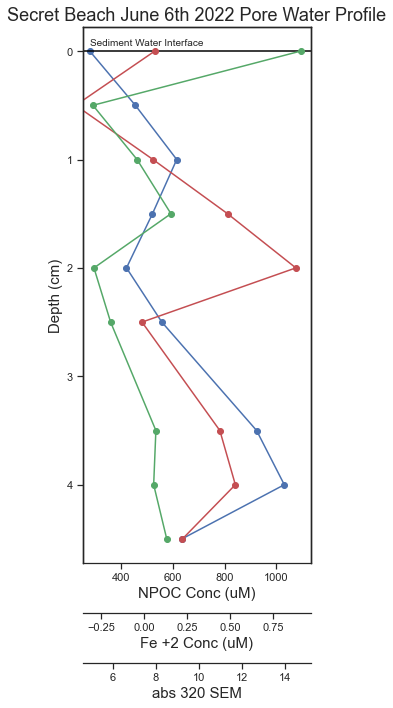

In [167]:
##PLOT MULTI VAR ON DEPTH 

sns.set_theme(style="ticks")

fig, ax = plt.subplots(figsize=(4,10))

X = ds["NPOC Conc (uM)"] #X var 
X = np.asarray(X, dtype=float).ravel()
Y = ds['Depth'] #Y var
Y = np.asarray(Y, dtype=float).ravel()
X1 = ds['Fe Conc (uM)_Fe2'] #X var 
X1 = np.asarray(X1, dtype=float).ravel()
X2 = ds['abs_320_SEM'] #X var 
X2 = np.asarray(X2, dtype=float).ravel()

Z = None #color

Xmin = X.min()
Xmax = X.max()
Ymin = Y.min()
Ymax = Y.max()
top_val = Ymax*1.05
bot_val = Ymin-(Ymax*.05)
min_val = Xmin*.9
max_val = Xmax*1.1
ax.plot(X, Y, 'o', ls='-', c='b')
ax.set_ylim(top_val, bot_val)
ax.set_xlim(min_val,max_val)
ax.set_xlabel("NPOC Conc (uM)", size = 15)
ax.set_ylabel("Depth (cm)", size = 15)
ax.set_title("Secret Beach June 6th 2022 Pore Water Profile", size = 18)
ax.axhline(y=0, color='black', linestyle='-', label='Sediment Water Interface')
ax.text(Xmin, -.05, 'Sediment Water Interface', fontsize=10)

ax2 = ax.twiny()
ax2.plot(X1, Y,'o', ls='-', c='r')
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 50))
ax2.set_xlabel('Fe +2 Conc (uM)', size= 15)
min_val1 = X1.min()*.9
max_val1 = X1.max()*1.1
ax2.set_xlim(min_val1,max_val1)

ax3 = ax2.twiny()
ax3.plot(X2, Y,'o', ls='-', c='g')
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
ax3.xaxis.set_ticks_position('bottom')
ax3.xaxis.set_label_position('bottom')
ax3.spines['bottom'].set_position(('outward', 100))
ax3.set_xlabel('abs 320 SEM', size= 15)
min_val2 = X2.min()*1.1
max_val2 = X2.max()*1.1
#ax3.set_xlim(min_val1,max_val1)


plt.show()

In [161]:
factor = 'Depth_Fe2'
dc = ds.loc[:, df.columns.intersection([factor])]
dc = dc.join(df_spectra, how='inner', sort=False)
dc = dc.set_index(factor, drop=True)
dc = dc.drop(labels=['bcorr'], axis=1)
dc = dc.transpose(copy=False)

dc

Depth_Fe2,0,0.5,1,1.5,2,2.5,3.5,4,4.5
189,-119.315664,-201.486424,-257.834480,-283.202389,4.823579,2.372993,2.357852,2.396895,1.927631
190,-119.315664,-201.486424,-257.834480,-283.202389,4.823579,2.372993,2.357852,2.396895,1.927631
191,-123.113951,-220.765066,-275.498092,-296.098134,49.341979,2.372993,2.357852,2.396895,-14.002340
192,-105.978342,-176.285610,-235.518831,-258.566946,4.590571,2.372993,2.357852,2.396895,1.927631
193,-213.015589,-309.075967,-359.725141,-386.671216,4.823579,2.372993,2.357852,2.396895,-41.140562
...,...,...,...,...,...,...,...,...,...
876,2.904076,11.801055,24.823512,31.088354,2.359237,7.693956,19.246419,23.823143,-0.552737
877,0.162906,11.679507,25.442119,33.486883,1.589841,7.742938,18.157166,23.592591,2.385574
878,2.486855,13.589439,26.817009,37.494855,3.435856,8.279055,23.466474,28.388339,1.821611
879,1.570930,14.552630,29.719024,38.904814,3.324955,8.069895,22.292365,27.896438,1.403778


86

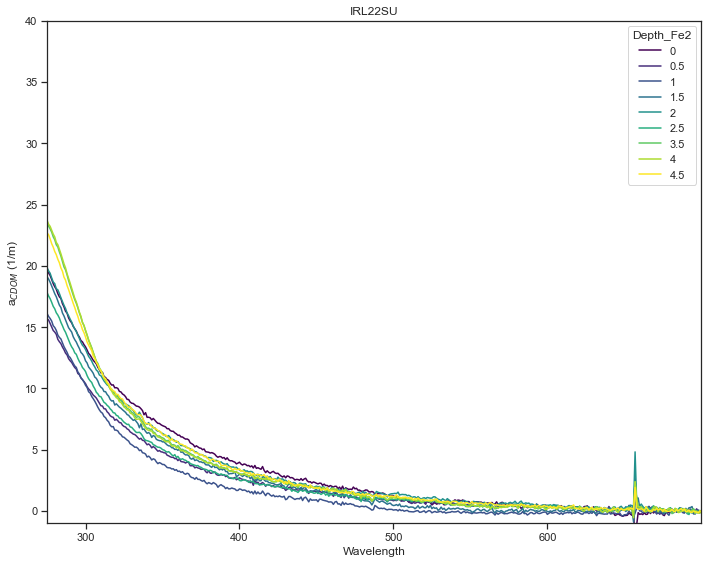

In [163]:
#HERE, WE MAKE A QUICK GRAPH OF THE SPECTRA
fig, ax = plt.subplots(figsize=(10,8))
dc.plot(label='', ax=ax, colormap = "viridis")
ax.set_ylim(-1,40)
pos1 = (275-189)
pos2 = (700-189)
ax.set_xlim(pos1,pos2)
ax.set_xlabel("Wavelength")
ax.set_ylabel("a$_{CDOM}$ (1/m)")
ax.set_title("IRL22SU")
ax.set_xticks([300-189,400-189,500-189,600-189], ["300","400","500","600"])
pos1

In [164]:
for col in df:
    print(col)

Treatment_Fe2
Campaign_Fe2
Date_Fe2
Location_Fe2
Depth_Fe2
Fe Conc (uM)_Fe2
Fe Conc (mg/L)_Fe2
Treatment_FeT
Campaign_FeT
Date_FeT
Location_FeT
Depth_FeT
Fe Conc (uM)_FeT
Fe Conc (mg/L)_FeT
Treatment
Campaign
Date
Location
Depth
NPOC Conc (mg/L)
TN Conc (mg/L)
NPOC Conc (uM)
TN Conc (uM)
ss_275_700_SEM
ss_275_295_SEM
ss_350_400_SEM
ss_275_700_HM
ss_275_295_HM
ss_350_400_HM
abs_254_SEM
abs_280_SEM
abs_320_SEM
abs_412_SEM
abs_440_SEM
abs_254_HM
abs_280_HM
abs_320_HM
abs_412_HM
abs_440_HM
SR_SEM
SR_HM
350_intergration


Text(0.5, 0, 'TN Conc (uM)')

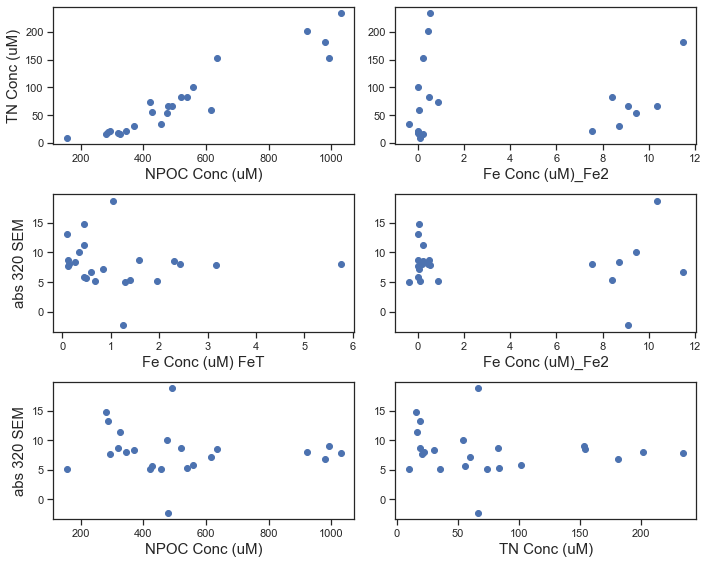

In [165]:
#HERE, WE CAN LOOK AT SOME COROLATIONS 
fig, ax = plt.subplots(3, 2, figsize=(10,8))
ax[0,0].scatter(df['NPOC Conc (uM)'],df['TN Conc (uM)'])
ax[0,0].set_xlabel('NPOC Conc (uM)', size= 15)
ax[0,0].set_ylabel('TN Conc (uM)', size= 15)

ax[0,1].scatter(df['Fe Conc (uM)_Fe2'],df['TN Conc (uM)'])
ax[0,1].set_xlabel('Fe Conc (uM)_Fe2', size= 15)
#ax[0,0].set_ylabel('TN Conc (uM)', size= 15)

ax[1,0].scatter(df['Fe Conc (uM)_FeT'],df['abs_320_SEM'])
ax[1,0].set_xlabel('Fe Conc (uM) FeT', size= 15)
ax[1,0].set_ylabel('abs 320 SEM', size= 15)

ax[1,1].scatter(df['Fe Conc (uM)_Fe2'],df['abs_320_SEM'])
ax[1,1].set_xlabel('Fe Conc (uM)_Fe2', size= 15)

ax[2,0].scatter(df['NPOC Conc (uM)'],df['abs_320_SEM'])
ax[2,0].set_xlabel('NPOC Conc (uM)', size= 15)
ax[2,0].set_ylabel('abs 320 SEM', size= 15)

ax[2,1].scatter(df['TN Conc (uM)'],df['abs_320_SEM'])
ax[2,1].set_xlabel('TN Conc (uM)', size= 15)